In [57]:
import numpy as np
import corner
import scipy.stats
import matplotlib.pyplot as plt

In [58]:
#Storing the Sampled beta values. beta 10, Beta 11r and beta11i
burnin = 7000
file_path = '/home/vaishali/Desktop/inferred_beta_pol/first_pol_bl_smica/accepted_m1M_pol_param_run1_bl_smica.dat'
file_path1 = '/home/vaishali/Desktop/inferred_beta_pol/first_pol_bl_smica/accepted_m1M_pol_hpc_run2_bl_smica.dat'
b_pol1 = np.loadtxt(file_path, skiprows=burnin, usecols=(0,1,3), unpack=True)
b_pol2 = np.loadtxt(file_path1, skiprows=burnin, usecols=(0,1,3), unpack=True)
b_pol = np.concatenate((b_pol1.T, b_pol2.T), axis=0)
b_pol = b_pol.T

In [59]:
b10_pol = b_pol[0,burnin:]
b11r_pol=b_pol[1,burnin:]
b11i_pol=b_pol[2,burnin:]
data = np.array([b10_pol,b11r_pol,b11i_pol])
print(data.shape)
print(np.mean(b10_pol))
print(np.std(b10_pol))

(3, 17140)
4.587526912442937
1.4706529434328048


In [60]:
hist = np.histogram(b10_pol, bins='auto',density=False)
hist_dist = scipy.stats.rv_histogram(hist)
pdf10 = hist_dist.pdf(b10_pol)
mode = pdf10.argmax()
b10_pol_mode=b10_pol[mode]

In [61]:
hist = np.histogram(b11r_pol, bins='auto',density=False)
hist_dist = scipy.stats.rv_histogram(hist)
pdf10 = hist_dist.pdf(b11r_pol)
mode = pdf10.argmax()
b11r_pol_mode=b11r_pol[mode]

In [62]:
hist = np.histogram(b11i_pol, bins='auto',density=False)
hist_dist = scipy.stats.rv_histogram(hist)
pdf11i = hist_dist.pdf(b11i_pol)
mode = pdf11i.argmax()
b11i_pol_mode=b11i_pol[mode]

In [63]:
flat_samples=np.ndarray(shape=(data.shape[1],3))
flat_samples[:,0]=b10_pol
flat_samples[:,1]=b11r_pol
flat_samples[:,2]=b11i_pol
labels = [r"$\beta_{10}$", r"$\beta_{11r}$", r"$\beta_{b11i}$"]

[4.328654320410371, -0.42402691146195404, -0.9524247017902965]


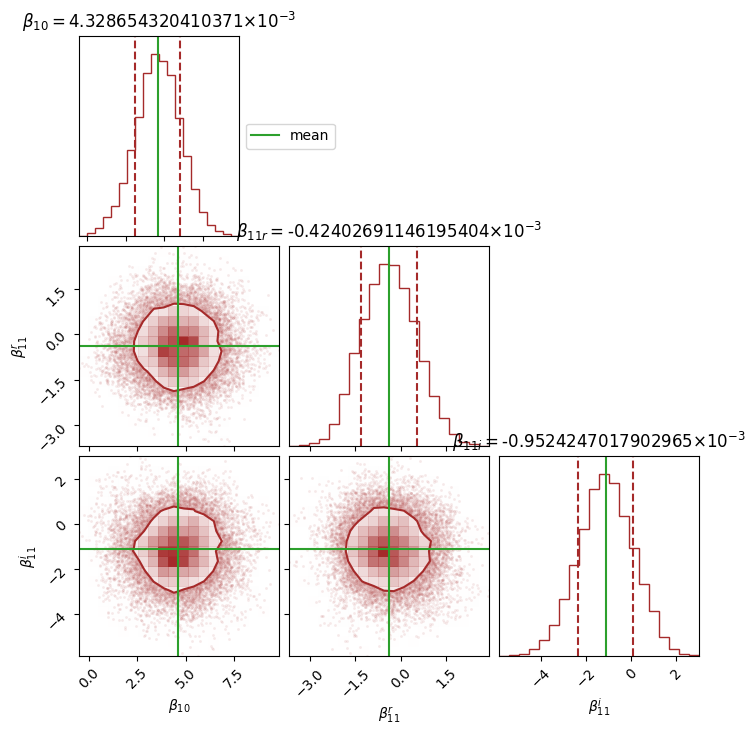

In [87]:
# This is the true mean of the second mode that we used above:
value1 = [b10_pol_mode,b11r_pol_mode,b11i_pol_mode]
print(value1)
# This is the empirical mean of the sample:
mean = np.array([np.mean(b10_pol),np.mean(b11r_pol),np.mean(b11i_pol)])
std_dev = np.array([np.std(b10_pol),np.std(b11r_pol),np.std(b11i_pol)])
# Make the base corner plot
fig = corner.corner(flat_samples, quantiles=(0.16, 0.84), levels=(0.68,),color='brown')
#_ = fig.suptitle("1-D and 2-d joint distributions of samples")
# Extract the axes
axes = np.array(fig.axes).reshape((3,3))
ax = axes[1, 0]
ax.set_ylabel(r'$\beta_{11}^r$')
ax = axes[2, 0]
ax.set_ylabel(r'$\beta_{11}^i$')
ax = axes[2, 0]
ax.set_xlabel(r'$\beta_{10}$')
ax = axes[2,1]
ax.set_xlabel(r'$\beta_{11}^r$')
ax = axes[2,2]
ax.set_xlabel(r'$\beta_{11}^i$')
ax = axes[0, 0]
ax.set_title(r'$\beta_{10} = $'+str(b10_pol_mode)+r'$\times 10^{-3}$')
ax = axes[1, 1]
ax.set_title(r'$\beta_{11r} = $'+str(b11r_pol_mode)+r'$\times 10^{-3}$')
ax = axes[2, 2]
ax.set_title(r'$\beta_{11i} = $'+str(b11i_pol_mode)+r'$\times 10^{-3}$')
#corner.overplot_points(figure, value1[None], marker="s", color="C1",label = 'maximum posterior point')
corner.overplot_lines(fig, mean, color="C2",label = 'mean')
ax = axes[0, 0]
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()
